### 1. Introduction
##### In this notebook, I use the Google Trends API ('pytrends') to analyze the popularity of luxury fashion  brands over time. This analysis will help explore wheter brand popularity correlates with pricing trends or resale value.

### 2. Imports and Setup

In [ ]:
pip install pytrends

In [10]:
from pytrends.request import TrendReq
import pandas as pd
import sqlite3
import os

### 3. Define Brands and TimeFrame &  Fetching API Data

##### We'll focus on a few high-profile luxury fashion brands such as Gucci, Prada, Louis Vuitton, and Balenciaga. Our timeframe will range from August 2020 to the present, sampled weekly.

##### We use the `pytrends` API to retrieve interest-over-time data for each brand. This data represents relative popularity (scaled from 0 to 100) and can indicate periods of heightened consumer attention.

In [ ]:
pytrends = TrendReq(hl='en-US', tz=360)  # English, US timezone

brands = ["Gucci", "Prada", "Balenciaga", "Louis Vuitton"]

# Fetch 5-year interest data (API call)
pytrends.build_payload(brands, timeframe='today 5-y', geo='US')
trends_data = pytrends.interest_over_time().drop(columns=['isPartial'])

trends_data.head()

,Gucci,Prada,Balenciaga,Louis Vuitton
date,,,,
2020-08-02,28,6,5,22
2020-08-09,28,6,4,22
2020-08-16,28,5,4,20
2020-08-23,24,5,4,19
2020-08-30,25,5,4,20


### 4. Visualize Brand Popularity

##### Using line plots, we compare how brand popularity evolves over time. We aim to spot notable spikes, consistent growth, or dips (which may correlate with product launches or media events)

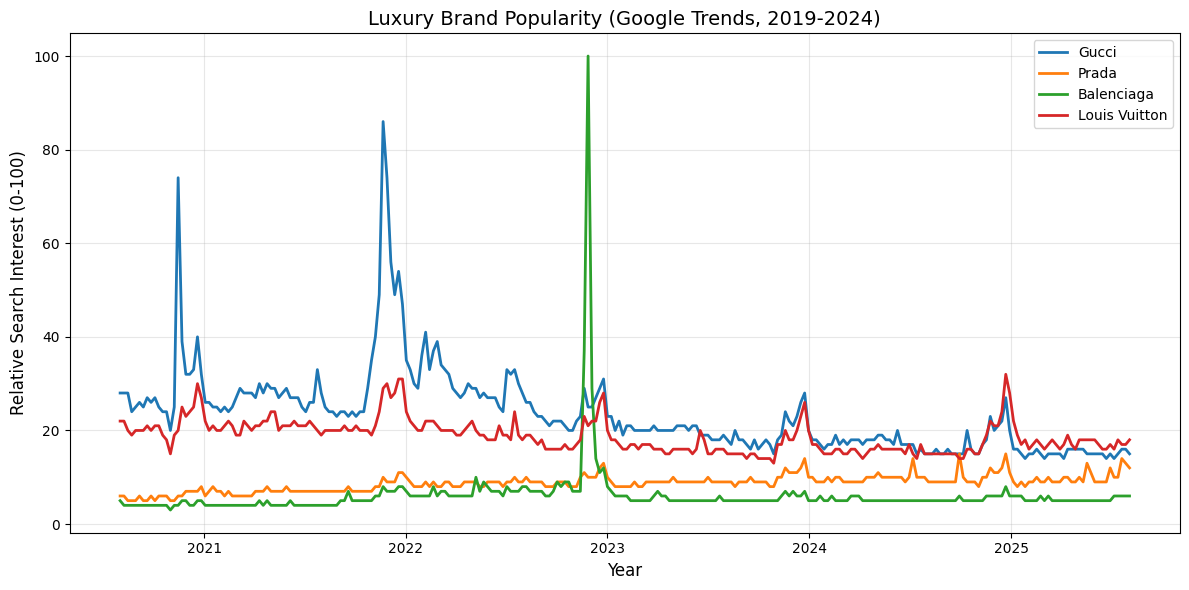

In [25]:
import matplotlib.pyplot as plt

# Plot all brands
plt.figure(figsize=(12, 6))
for brand in brands:
    plt.plot(trends_data.index, trends_data[brand], label=brand, linewidth=2)

plt.title("Luxury Brand Popularity (Google Trends, 2019-2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Relative Search Interest (0-100)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save for Power BI/Reports
plt.savefig("../visualizations/brand_trends.png", dpi=300, bbox_inches='tight')
plt.show()

### 5. Saving Data

##### We standardize column names, ensure date formatting, and export the cleaned dataset to `data/processed/google_trends_data.csv` for use in SQL, Power BI, and ML models.

In [19]:
os.makedirs("data/raw", exist_ok=True)

# Save to CSV (real data)
csv_path = "../data/raw/google_trends_real.csv"
trends_data.to_csv(csv_path, index=False)
print(f"Real data saved to {csv_path}")

Real data saved to ../data/raw/google_trends_real.csv


In [22]:
print(pd.read_csv("data/raw/google_trends_real.csv").head())

   Gucci  Prada  Balenciaga  Louis Vuitton
0     28      6           5             22
1     28      6           4             22
2     28      5           4             20
3     24      5           4             19
4     25      5           4             20


In [20]:
os.makedirs("data/processed", exist_ok=True)

# Connect to SQLite and save
db_path = "../data/processed/database.db"
conn = sqlite3.connect(db_path)
trends_data.to_sql("google_trends", conn, if_exists="replace", index=False)
conn.close() 

print(f"Real data saved to SQLite: {db_path}")

Real data saved to SQLite: ../data/processed/database.db


In [21]:
conn = sqlite3.connect("data/processed/database.db")
print(pd.read_sql("SELECT * FROM google_trends LIMIT 5", conn))
conn.close()

   Gucci  Prada  Balenciaga  Louis Vuitton
0     28      6           5             22
1     28      6           4             22
2     28      5           4             20
3     24      5           4             19
4     25      5           4             20
